In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

Step 1: read in data from the .xls file

In [60]:
DATA_FILE = '../data/fire_theft.xls'

book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

Step 2: create placeholders for input X (number of fire) and label Y (number of theft)

In [61]:
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

Step 3: create weight and bias, initialized to 0

In [62]:
w = tf.Variable(0.0, name='w')
b = tf.Variable(0.0, name='b')

Step 4: build model to predict Y

In [63]:
Y_predicted = w * X + b

Step 5: use the square error as the loss function

In [26]:
loss = tf.square(Y - Y_predicted)

Step 5a: implement Huber loss function from lecture and try it out

In [64]:
def huber_loss(labels, predictions, delta=1.0):
    residual = tf.abs(predictions - labels)
    condition = tf.less(residual, delta)
    small_res = 0.5 * tf.square(residual)
    large_res = delta * residual - 0.5*tf.square(delta)
    return tf.where(condition, small_res, large_res)

In [120]:
losss = []
losss.append(loss)
losss.append(huber_loss(Y, Y_predicted, delta=0.01))
losss.append(huber_loss(Y, Y_predicted, delta=0.05))
losss.append(huber_loss(Y, Y_predicted, delta=0.1))
losss.append(huber_loss(Y, Y_predicted, delta=0.5))
losss.append(huber_loss(Y, Y_predicted, delta=1.))
losss.append(huber_loss(Y, Y_predicted, delta=5.))
losss.append(huber_loss(Y, Y_predicted, delta=10.))
losss.append(huber_loss(Y, Y_predicted, delta=100.))
losss.append(huber_loss(Y, Y_predicted, delta=1000.))

Step 6: using gradient descent with learning rate of 0.01 to minimize loss

In [121]:
optimizers = []
for i in range(len(losss)):
    optimizers.append(tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(losss[i]))

Step 7: initialize the necessary variables, in this case, w and b

In [122]:
wh = []
bh = []

Step 8: train the model

In [123]:
for j in range(len(losss)):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
        
        for i in range(50): # train the model 50 epochs
            total_loss = 0
            for x, y in data:
                # Session runs train_op and fetch values of loss
                _, l = sess.run([optimizers[j], losss[j]], feed_dict={X:x, Y:y})
                total_loss += l
            print('Epoch {0}: {1}'.format(i, total_loss/float(n_samples)))
        
        cur_wh, cur_bh = sess.run([w, b])
        wh.append(cur_wh)
        bh.append(cur_bh)

# close the writer when you're done using it
writer.close() 

Epoch 0: 1.6008216502751955
Epoch 1: 1.44983124874887
Epoch 2: 1.3062537504093987
Epoch 3: 1.1648463694111255
Epoch 4: 1.0498724602872418
Epoch 5: 0.9841437670623973
Epoch 6: 0.9552940011379265
Epoch 7: 0.9305170683988503
Epoch 8: 0.9118420355731532
Epoch 9: 0.8931670563982889
Epoch 10: 0.878640535556423
Epoch 11: 0.8713443514314436
Epoch 12: 0.8640714866951817
Epoch 13: 0.8589779299439951
Epoch 14: 0.8557045699812339
Epoch 15: 0.8532004564379653
Epoch 16: 0.8504359524094547
Epoch 17: 0.8491055496657888
Epoch 18: 0.8469341864166338
Epoch 19: 0.8488387967282462
Epoch 20: 0.8464968239533759
Epoch 21: 0.8485720350983597
Epoch 22: 0.8463028860721915
Epoch 23: 0.8481325039285279
Epoch 24: 0.8458174184918226
Epoch 25: 0.8478657065979427
Epoch 26: 0.845416038776637
Epoch 27: 0.8475731906835877
Epoch 28: 0.8459211602603318
Epoch 29: 0.8462828044097738
Epoch 30: 0.8449781062746686
Epoch 31: 0.8466473381877655
Epoch 32: 0.8445407187987474
Epoch 33: 0.8463805616345434
Epoch 34: 0.8441033446052599

Epoch 39: 14.461294228493768
Epoch 40: 14.727712008215132
Epoch 41: 14.07595918292091
Epoch 42: 14.746414882441362
Epoch 43: 13.95736382617837
Epoch 44: 14.663308109156787
Epoch 45: 13.851771616155194
Epoch 46: 14.57776450695071
Epoch 47: 13.756095231022863
Epoch 48: 14.489615471944923
Epoch 49: 13.669001768778323
Epoch 0: 96.04761823869887
Epoch 1: 89.47907010714214
Epoch 2: 88.1360092673983
Epoch 3: 86.29947725931804
Epoch 4: 85.18870912563233
Epoch 5: 83.4906641358421
Epoch 6: 81.82523607427166
Epoch 7: 80.66907209991699
Epoch 8: 79.36604584567249
Epoch 9: 78.28279109718278
Epoch 10: 77.28716593413125
Epoch 11: 75.14338187518574
Epoch 12: 74.28681675078613
Epoch 13: 75.00977769172962
Epoch 14: 70.69810984709433
Epoch 15: 70.9568085149374
Epoch 16: 70.14401595281102
Epoch 17: 70.7639128822678
Epoch 18: 71.43205379987401
Epoch 19: 71.43176278090547
Epoch 20: 70.313358497185
Epoch 21: 69.40759941072957
Epoch 22: 68.92978076814185
Epoch 23: 68.03329898465779
Epoch 24: 67.1779757649416
E

Step 9: output the values of w and b

In [31]:
ws, bs = sess.run([w, b])

Step 10: plot the results

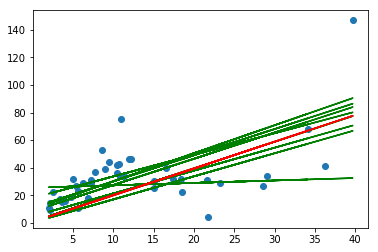

In [128]:
Xd, Yd = data[:, 0], data[:, 1]
plt.scatter(Xd, Yd, label="Real data")
#print(wh[0], bh[0])
for i in range(1, len(losss)):
    plt.plot(Xd, wh[i] * Xd + bh[i], label="Predicted Huber data", color='g')
plt.plot(Xd, wh[0] * Xd + bh[0], label="Predicted Sq data", color='r')
plt.show()